In [3]:
from sklearn.datasets import fetch_20newsgroups # import the dataset
from pprint import pprint
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
import tensorflow_datasets as tfds

# Reading the dataset 
#### take only four category from the dataset because (run time problem)

In [25]:
# take the train subset and test subset
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space'
]
data_train = fetch_20newsgroups(subset='train',
                                categories=categories,
                                shuffle = True,
                                random_state = 7)

data_test = fetch_20newsgroups(subset='test',
                                shuffle = True,
                                categories=categories,
                                random_state = 7)

In [26]:
pprint(list(data_train.target_names))

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


In [31]:
# get the labels of x_test and x_train 
X_train,y_train,X_test,y_test =data_train.data,data_train.target,data_test.data, data_test.target

In [28]:
print(f"Num. of training samples is {len(y_train)}")
print(f"Num. of test samples is {len(y_test)}")

Num. of training samples is 2034
Num. of test samples is 1353


# SVM Model

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Text Preprocessing 

1-Term Frequency – Inverse Document Frequency
Term Frequency: Number of time a word appears in a text document.
Inverse Document Frequency: Measure the word is a rare word or common word in a document.

In [32]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

max_df : Ignore the term that has a document frequency higher than a threshold.
min_df : Ignore the term that has a document frequency lower than a threshold.
stop_words : Remove the defined words from resulting vocabulary.
use_idf : boolean (default=True). Enable inverse-document-frequency reweighting.

In [33]:
svm_clf = SVC()
svm_clf.fit(X_train.toarray(), y_train)

SVC()

In [34]:
svm_pred = svm_clf.predict(X_train.toarray())
train_score = accuracy_score(y_train, svm_pred) * 100
print(f"Train accuracy score: {train_score:.2f}%")

svm_pred = svm_clf.predict(X_test.toarray())
test_score = accuracy_score(y_test, svm_pred) * 100
print(f"Test accuracy score: {test_score:.2f}%")

Train accuracy score: 99.95%
Test accuracy score: 88.62%


#### Confusion Matrix

In [37]:
from sklearn.metrics import  confusion_matrix ,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

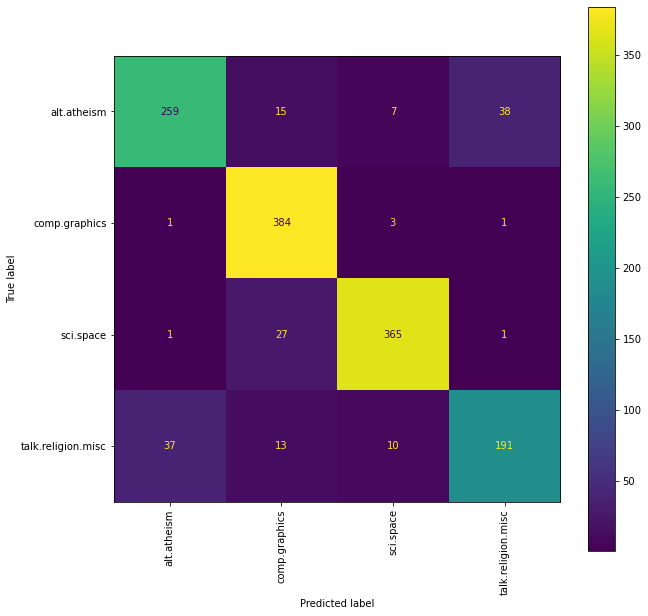

In [42]:
cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=data_train.target_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax)

plt.show()

#  CNN Model 


## Vetoriztion Step 
convert each word to vector using tensorflow_datasets

In [28]:
print(3)
import tensorflow_datasets as tfds
vocab_fname='vocab_file'
print(2)
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(X_train, target_vocab_size=2**18)
print(1)
train_inputs = [tokenizer.encode(text) for text in X_train]
test_inputs = [tokenizer.encode(text) for text in X_test]
tokenizer.save_to_file(vocab_fname)


3
2
1


#### next run time load directly the vocab file 

In [14]:
vocab_fname='vocab_file'

In [16]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.load_from_file(vocab_fname)
train_inputs = [tokenizer.encode(text) for text in X_train]
test_inputs = [tokenizer.encode(text) for text in X_test]

In [17]:
print(train_inputs[0]==train_inputs[1])

False


Padding is needed due to invarient of inputs data 

In [45]:
import  tensorflow as tf
MAX_LEN = max([len(sentence) for sentence in train_inputs])
print(MAX_LEN)
train_inputs = tf.keras.preprocessing.sequence.pad_sequences(train_inputs,
                                                             value=0,
                                                             padding="post",
                                                             maxlen=MAX_LEN)

test_inputs = tf.keras.preprocessing.sequence.pad_sequences(test_inputs,
                                                            value=0,
                                                            padding="post",
                                                            maxlen=MAX_LEN)


14220


### Next Build the CNN architecture model 